In [35]:
import pandas as pd
import numpy as np

In [36]:
df = pd.read_csv('data/SBAnational.csv', dtype='unicode')

df.head(1)

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,...,N,Y,NaN,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"


# Explication de variables

- `DisbursementGross` signifie que plus le montant du prêt est élevé, plus cela signifie que l'entreprise sera établie et en expansion => augmente la probabilité de rembourser le prêt.
- `State` suivant l'Etat dans lequel est contracté le prêt, cela impacte le taux de celui-ci 

<img src="data/state.jpg" />

- `NAICS` les 2 premiers chiffres de cette colonne représente un type d'industrie

|2 digit code|Description|Default rate (%)|
|:----|:----|:----|
|21|Mining, quarrying, and oil and gas extraction|8|
|11|Agriculture, forestry, fishing and hunting|9|
|55|Management of companies and enterprises|10|
|62|Health care and social assistance|10|
|22|Utilities|14|
|92|Public administration|15|
|54|Professional, scientific, and technical services|19|
|42|Wholesale trade|19|
|31–33|Manufacturing|19, 16, 14|
|81|Other services (except public administration)|20|
|71|Arts, entertainment, and recreation|21|
|72|Accommodation and food services|22|
|44–45|Retail trade|22, 23|
|23|Construction|23|
|56|Administrative/support & waste management/remediation Service|24|
|61|Educational services|24|
|51|Information|25|
|48–49|Transportation and warehousing|27, 23|
|52|Finance and insurance|28|
|53|Real estate and rental and leasing|29|

- `NewExist` le fait qu'une entreprise soit nouvelle ou établie. 1 si >= 2 ans, 2 sinon

# Copie pour perf

In [37]:
df_sba = df.copy()
df_sba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899164 entries, 0 to 899163
Data columns (total 27 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   LoanNr_ChkDgt      899164 non-null  object
 1   Name               899150 non-null  object
 2   City               899134 non-null  object
 3   State              899150 non-null  object
 4   Zip                899164 non-null  object
 5   Bank               897605 non-null  object
 6   BankState          897598 non-null  object
 7   NAICS              899164 non-null  object
 8   ApprovalDate       899164 non-null  object
 9   ApprovalFY         899164 non-null  object
 10  Term               899164 non-null  object
 11  NoEmp              899164 non-null  object
 12  NewExist           899028 non-null  object
 13  CreateJob          899164 non-null  object
 14  RetainedJob        899164 non-null  object
 15  FranchiseCode      899164 non-null  object
 16  UrbanRural         8

# nettoyage et formatage des data

In [38]:
def transform_curracy(df, columns):
    for col in columns:
        df[col] = df[col].replace(r'[\$ ,\.]', '', regex=True).astype(float)

transform_curracy(df_sba, ['GrAppv', 'DisbursementGross', 'SBA_Appv', 'ChgOffPrinGr'])

df_sba.NAICS = df_sba.NAICS.astype(str).str[0:2].astype(int)
df_sba.ApprovalFY.astype(str).str[0:4].astype(int)
df_sba.CreateJob = df_sba.CreateJob.astype(int)
df_sba.Zip = df_sba.Zip.astype(int)
df_sba.Term = df_sba.Term.astype(int)
df_sba.NoEmp = df_sba.NoEmp.astype(int)
df_sba.CreateJob = df_sba.CreateJob.astype(int)
df_sba.RetainedJob = df_sba.RetainedJob.astype(int)
df_sba.FranchiseCode = df_sba.FranchiseCode.astype(int)
df_sba.UrbanRural = df_sba.UrbanRural.astype(int)

df_sba.head(2)

print(df_sba.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899164 entries, 0 to 899163
Data columns (total 27 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   LoanNr_ChkDgt      899164 non-null  object 
 1   Name               899150 non-null  object 
 2   City               899134 non-null  object 
 3   State              899150 non-null  object 
 4   Zip                899164 non-null  int64  
 5   Bank               897605 non-null  object 
 6   BankState          897598 non-null  object 
 7   NAICS              899164 non-null  int64  
 8   ApprovalDate       899164 non-null  object 
 9   ApprovalFY         899164 non-null  object 
 10  Term               899164 non-null  int64  
 11  NoEmp              899164 non-null  int64  
 12  NewExist           899028 non-null  object 
 13  CreateJob          899164 non-null  int64  
 14  RetainedJob        899164 non-null  int64  
 15  FranchiseCode      899164 non-null  int64  
 16  Ur

## drop des colonnes qui ne sont pas utiles

In [39]:
#df_sba.drop(columns=['LoanNr_ChkDgt', 'Name', 'City', 'Bank'], inplace=True)
df_sba.drop(columns=['LoanNr_ChkDgt'], inplace=True)
df_sba.head(2)

,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,...,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,45,28-Feb-97,1997,84,...,N,Y,NaN,28-Feb-99,6000000.0,$0.00,P I F,0.0,6000000.0,4800000.0
1,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,72,28-Feb-97,1997,60,...,N,Y,NaN,31-May-97,4000000.0,$0.00,P I F,0.0,4000000.0,3200000.0


## drop des colonnes fortement corrélées (colinéarité)

In [40]:
df_sba.drop(columns=['State', 'BankState', 'CreateJob', 'SBA_Appv'], inplace=True)

## drop des colonnes data leaking

In [41]:
df_sba.drop(columns=['ChgOffDate', 'DisbursementDate', 'DisbursementGross', 'BalanceGross'], inplace=True)
df_sba.head(2)

,Name,City,Zip,Bank,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,MIS_Status,ChgOffPrinGr,GrAppv
0,ABC HOBBYCRAFT,EVANSVILLE,47711,FIFTH THIRD BANK,45,28-Feb-97,1997,84,4,2,0,1,0,N,Y,P I F,0.0,6000000.0
1,LANDMARK BAR & GRILLE (THE),NEW PARIS,46526,1ST SOURCE BANK,72,28-Feb-97,1997,60,2,2,0,1,0,N,Y,P I F,0.0,4000000.0


## OHE de la target

In [42]:
from sklearn.preprocessing import LabelBinarizer

df_sba.dropna(subset=['MIS_Status'], inplace=True)  # Pour tester avant de voir si on fait de l'imputation (1997 nan / 899163 observations)
df_sba.MIS_Status = LabelBinarizer().fit_transform(df_sba.loc[:,['MIS_Status']])

# display(df_sba.head(2))
# df_sba.info()


In [43]:
df_sba.LowDoc = df_sba.LowDoc.replace(r'[C1SRA0]', np.nan, regex=True)
df_sba.RevLineCr = df_sba.RevLineCr.replace(r'[0T`1C32R7A5\.,4\-Q]', np.nan, regex=True)
df_sba.NewExist = df_sba.NewExist.replace(r'[0]', np.nan, regex=True)


## missing values

<Axes: >

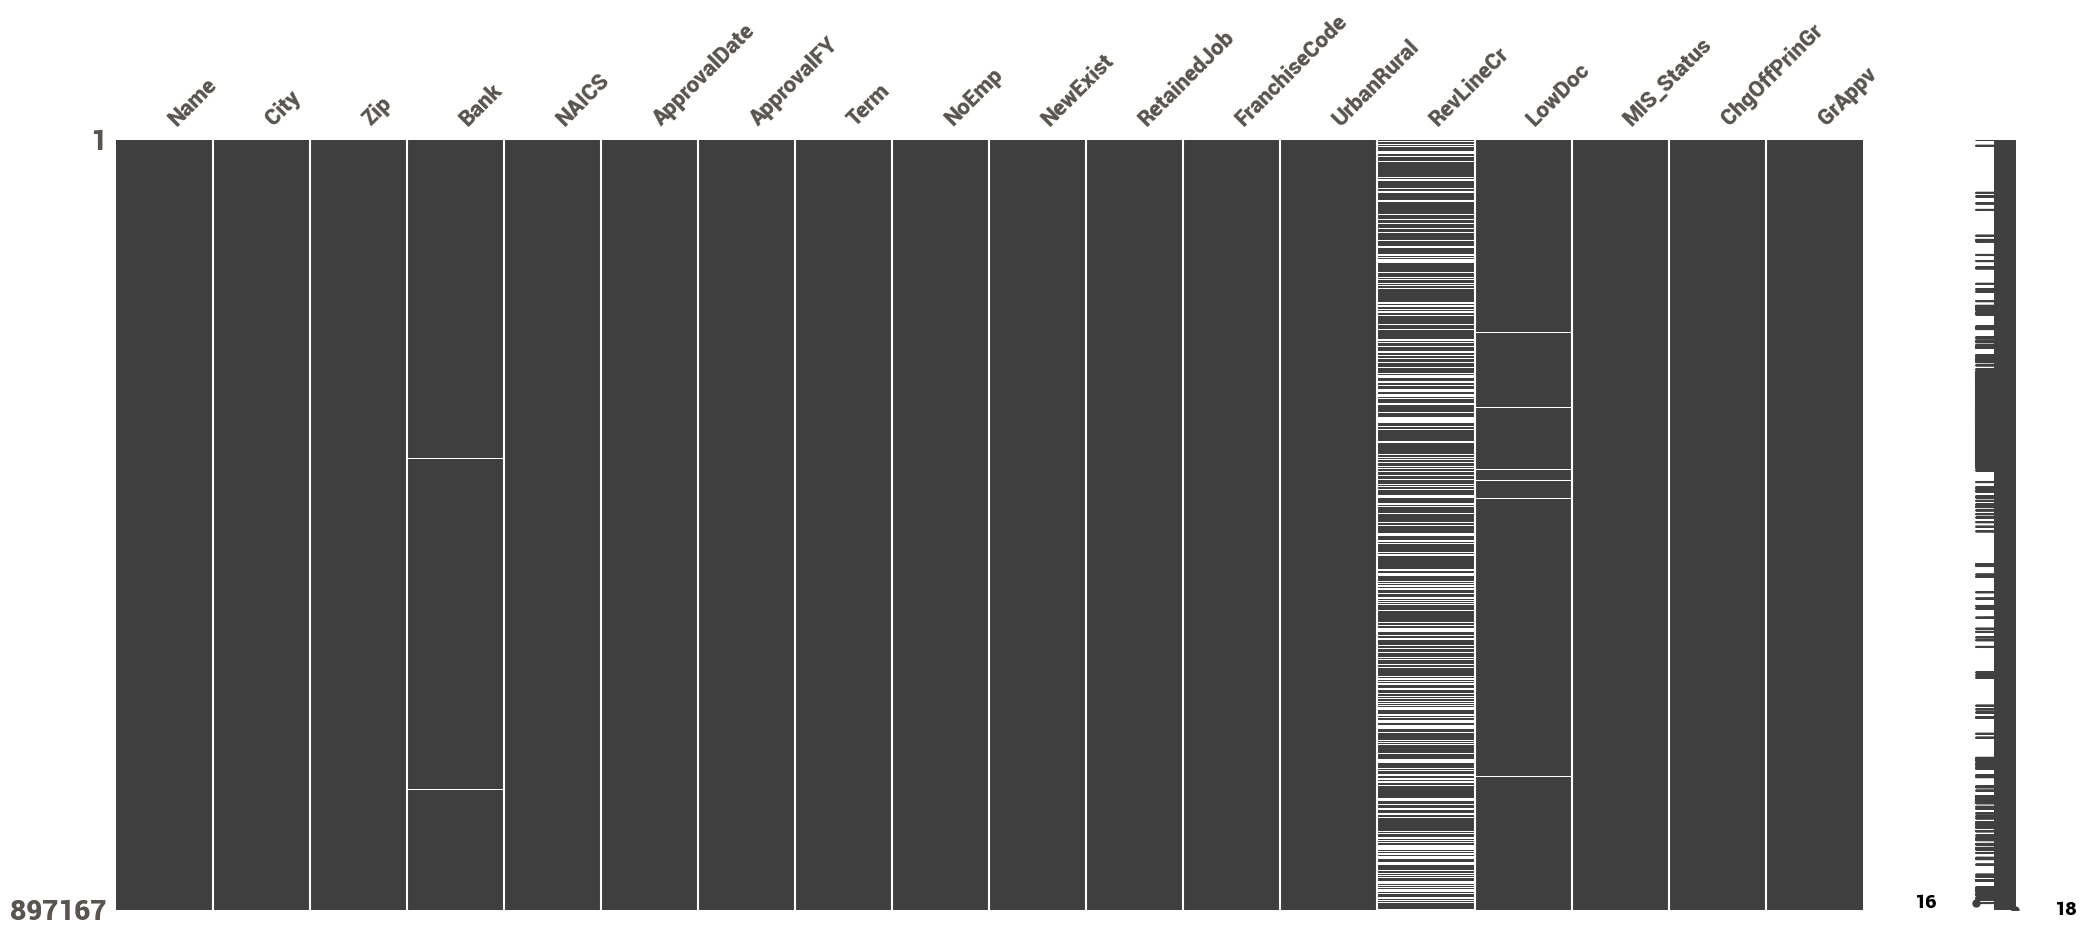

In [44]:
import missingno as msno
msno.matrix(df_sba)

## Imputer
### LowDoc

<Axes: >

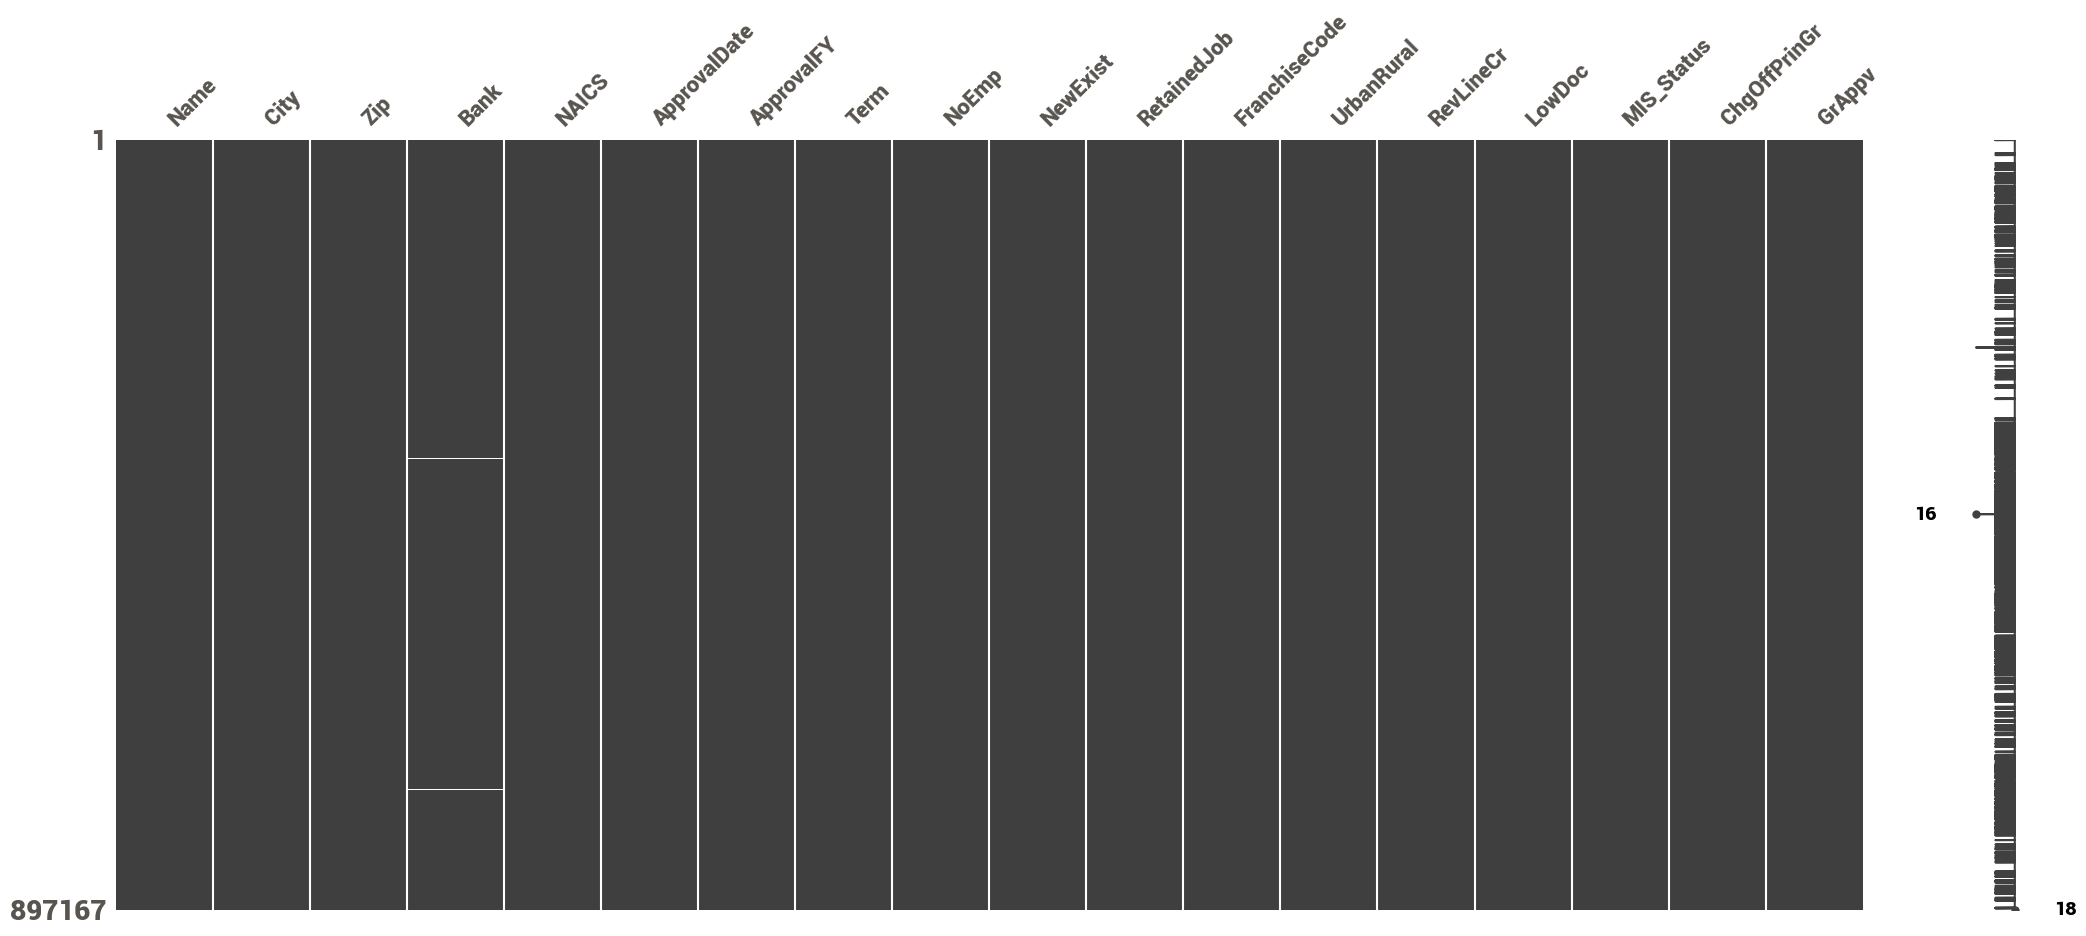

In [45]:
from feature_engine.imputation import RandomSampleImputer
imputer = RandomSampleImputer()
result = imputer.fit_transform(df_sba.loc[:,['LowDoc']])
df_sba.LowDoc = result['LowDoc']

result = imputer.fit_transform(df_sba.loc[:,['RevLineCr']])
df_sba.RevLineCr = result['RevLineCr']

result = imputer.fit_transform(df_sba.loc[:,['NewExist']])
df_sba.NewExist = result['NewExist']

msno.matrix(df_sba)


In [46]:
import sweetviz as sv
feature_config = sv.FeatureConfig(force_num=["MIS_Status"])

sweet_report = sv.analyze(df_sba, 'MIS_Status', feat_cfg=feature_config, )
sweet_report.show_html(filepath='sweetviz_eda/with_imputation.html')

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:01 -> (00:00 left)


Report sweetviz_eda/with_imputation.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [51]:
# sweet_report = sv.compare_intra(df_sba, df_sba["Bank"] == "BANK OF AMERICA NATL ASSOC", ['BANK OF AMERICA NATL ASSOC', 'Autre'], "MIS_Status", feature_config)
# sweet_report.show_html()

df_sba[df_sba.duplicated()]

,Name,City,Zip,Bank,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,MIS_Status,ChgOffPrinGr,GrAppv
243,REYNOLDS H20 PLUS,WEST READING,19611,WELLS FARGO BANK NATL ASSOC,0,4-Dec-97,1998,60,46,1,0,21400,0,Y,N,1,0.0,10000000.0
18001,ALLAN G. BEAL DBA ALLAN G. BEA,WESTPORT,12993,CITIZENS BANK NATL ASSOC,62,16-Dec-04,2005,84,1,1,0,1,1,N,N,1,0.0,1000000.0
22609,"ALLIANCE ANIMAL HOSPITAL, INC.",ALLIANCE,44601,CITIZENS BANK NATL ASSOC,54,24-Jan-05,2005,84,10,1,10,1,1,Y,N,1,0.0,1000000.0
32480,ALDNET MEDIA GROUP LLC,ROCKY RIVER,44116,CITIZENS BANK NATL ASSOC,54,25-Mar-05,2005,84,11,1,11,1,1,Y,N,1,0.0,5000000.0
35632,"ARCHITECTURAL ORNAMENTS, INC.",KANSAS CITY,64126,"UMB BANK, NATIONAL ASSOCIATION",32,22-May-97,1997,12,16,1,0,1,0,N,N,1,0.0,5000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
873723,PITELL CONTRACTING,PITTSBURGH,15237,FIRST NATL BK OF PENNSYLVANIA,23,6-Aug-96,1996,52,12,1,0,1,0,N,N,1,0.0,8000000.0
876557,LON & ESTHER YATMAN FAMILY TRU,LOS ANGELES,90037,CITY NATIONAL BANK,56,26-Aug-96,1996,300,70,1,0,1,0,N,N,1,0.0,93000000.0
881357,NOODLES & COMPANY,INDIANAPOLIS,46208,INDIANA BUSINESS BANK,72,4-Jan-06,2006,87,40,2,0,1,1,N,N,1,0.0,42960000.0
882745,OLA,CANOGA PARK,91306,COMMUNITY W. BANK NATL ASSOC,54,30-Sep-96,1996,264,3,1,0,1,0,N,N,1,0.0,10100000.0
